SpM
=============

In [2]:
%load_ext autoreload

In [3]:
%autoreload 2

In [4]:
from spm_omega import AnaContSmoothOpt, AnaContSmooth, AnaContSpM

import numpy as np
import sparse_ir
from sparse_ir import FiniteTempBasis, MatsubaraSampling, TauSampling
import pytest


%matplotlib inline
from matplotlib import pyplot as plt


In [5]:
wmax = 10.0
beta = 100.0
lambda_ = wmax * beta
basis = sparse_ir.FiniteTempBasis("F", beta, wmax, eps=1e-7)

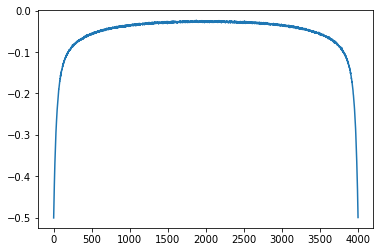

In [6]:
gtau_dirty = np.loadtxt("Gtau.in")[:,1]
tau = np.linspace(0, beta, gtau_dirty.size)

"""
gaussian = lambda x, mu, sigma: np.exp(-((x-mu)/sigma)**2)/(np.sqrt(np.pi)*sigma)

rho = lambda omega: 0.2*gaussian(omega, 0.0, 0.15) + \
    0.4*gaussian(omega, 1.0, 0.8) + 0.4*gaussian(omega, -1.0, 0.8)

noise = 1e-3
ntau = 4001
tau = np.linspace(0, beta, ntau)
smpl = sparse_ir.TauSampling(basis, tau)
rhol = basis.v.overlap(rho)
gl = - basis.s * rhol
gtau = smpl.evaluate(gl, axis=0)
gtau_dirty = gtau + noise * np.random.randn(gtau.size)
"""

plt.plot(gtau_dirty)

In [19]:
moment = np.ones((1,1))
moment = None
solver = AnaContSmoothOpt(beta, wmax, "F", "time", tau, moment=moment, scale_alpha=True)

debug 0.0007005575196770629


In [28]:
#x, info = solver.solve(gtau[:,None,None], alpha, niter=40000, spd=True)
x, info = solver.solve_elbow(gtau_dirty[:,None,None], 1e-5, 1e+5, 20, niter=1000, spd=True)
#alpha = 1e-7
#x, info = solver.solve(gtau[:,None,None], alpha, niter=10000, spd=True)

In [29]:
#plt.semilogy(info["optimizer"]._primal_residual)
#plt.semilogy(info["optimizer"]._dual_residual)

9


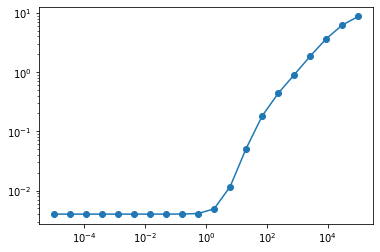

In [40]:
plt.loglog(info["alphas"], info["lstsq_alphas"], marker="o")
print(info["ialpha_opt"])

In [31]:
nomega = 10000
omega = np.linspace(-wmax, wmax, nomega)
#omega = solver._smpl_real_w
rho_omega = solver.rho_omega(x, omega)

/home/vscode/.local/lib/python3.9/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(-5.0, 5.0)

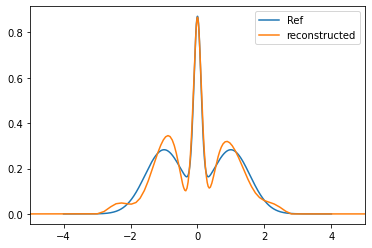

In [32]:
data = np.loadtxt("Gtau.in.dos")
omega_ref = data[:,0]
rho_omega_ref = data[:,1]

plt.plot(omega_ref, rho_omega_ref[:], label="Ref")
plt.plot(omega, rho_omega[:,0,0], label="reconstructed")
plt.legend()
plt.xlim([-5, 5])

In [45]:
print(info["ialpha_opt"])
print(info["alphas"][info["ialpha_opt"]])

9
1.832980710832437


In [46]:
alpha = info["alphas"][info["ialpha_opt"]]
x2, info2 = solver.solve(gtau_dirty[:,None,None], alpha, niter=10000, spd=True)

/home/vscode/.local/lib/python3.9/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(-5.0, 5.0)

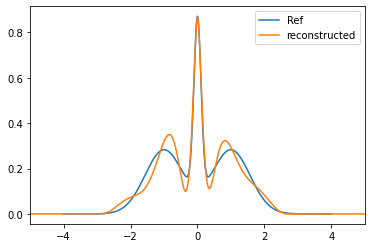

In [47]:
rho_omega = solver.rho_omega(x2, omega)
plt.plot(omega_ref, rho_omega_ref[:], label="Ref")
plt.plot(omega, rho_omega[:,0,0], label="reconstructed")
plt.legend()
plt.xlim([-5, 5])

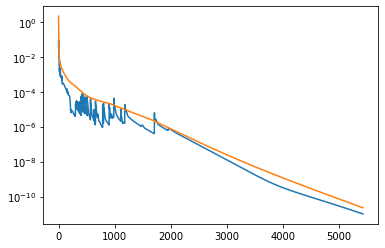

In [48]:
plt.semilogy(info2["optimizer"]._primal_residual)
plt.semilogy(info2["optimizer"]._dual_residual)